<a href="https://colab.research.google.com/github/LuGu05/Curso_Data_Science_Alura/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curso 8 (pandas)



# Criando os nomes 

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [3]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [4]:
frames = [nomes_f, nomes_m]


In [5]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()

In [7]:
nomes.sample(5)

,nome
23,FERNANDO
178,DENILSON
16,EDUARDO
144,LORENA
39,VITOR


# Incluindo Id dos alunos

In [8]:
import numpy as np

In [9]:
np.random.seed(123)

In [10]:
total_alunos = len(nomes)

In [11]:
total_alunos

400

In [12]:
nomes['Id_aluno'] = np.random.permutation(total_alunos) + 1

In [13]:
nomes.sample(3)

,nome,Id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382


In [14]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [15]:
nomes.sample(5)

,nome,Id_aluno,dominio
84,SEVERINO,78,@dominiodoemmail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemmail.com.br
10,SANDRA,174,@dominiodoemmail.com.br
171,TERESINHA,45,@dominiodoemmail.com.br


In [16]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [17]:
nomes

,nome,Id_aluno,dominio,email
0,MARIA,235,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@dominiodoemmail.com.br,antonia@dominiodoemmail.com.br
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemmail.com.br,walter@dominiodoemmail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemmail.com.br,michael@dominiodoemmail.com.br
198,ALVARO,383,@dominiodoemmail.com.br,alvaro@dominiodoemmail.com.br


# Criando a Tabela Curso

In [18]:
!pip3 install html5lib
!pip3 install lxml


In [19]:
import html5lib

In [20]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [21]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [22]:
type(cursos)

list

In [23]:
cursos = cursos[0]

In [24]:
type(cursos)

pandas.core.frame.DataFrame

In [25]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [26]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})


In [27]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [28]:
cursos['Id']= cursos.index + 1

In [29]:
cursos.head()

,nome_do_curso,Id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [30]:
cursos = cursos.set_index('Id')

In [31]:
cursos.head()

,nome_do_curso
Id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [32]:
nomes.sample(5)

,nome,Id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemmail.com.br,arthur@dominiodoemmail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemmail.com.br,helena@dominiodoemmail.com.br
183,IRACI,8,@dominiodoemmail.com.br,iraci@dominiodoemmail.com.br
189,DALVA,137,@dominiodoemmail.com.br,dalva@dominiodoemmail.com.br


In [33]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [34]:
nomes.sample(5)

,nome,Id_aluno,dominio,email,matriculas
105,MILENA,371,@dominiodoemmail.com.br,milena@dominiodoemmail.com.br,2
183,IRACI,8,@dominiodoemmail.com.br,iraci@dominiodoemmail.com.br,1
10,LUIS,125,@dominiodoemmail.com.br,luis@dominiodoemmail.com.br,2
139,OSMAR,71,@dominiodoemmail.com.br,osmar@dominiodoemmail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,2


In [35]:
nomes.matriculas.describe()

count    400.000000
mean       2.135000
std        1.515757
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [36]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


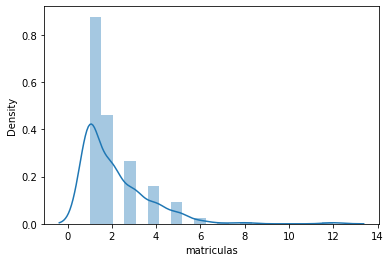

In [37]:
sns.distplot(nomes.matriculas)

In [38]:
nomes.matriculas.value_counts()

1     184
2      97
3      56
4      34
5      19
6       5
12      2
8       2
7       1
Name: matriculas, dtype: int64

# Selecionando curso

In [39]:
nomes.sample(3)

,nome,Id_aluno,dominio,email,matriculas
103,MAICON,295,@servicodoemail.com,maicon@servicodoemail.com,4
44,RAIMUNDA,259,@servicodoemail.com,raimunda@servicodoemail.com,5
50,RAFAELA,27,@dominiodoemmail.com.br,rafaela@dominiodoemmail.com.br,3


In [40]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [41]:
for index, row in nomes.iterrows():
  Id = row.Id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [Id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['Id_aluno', 'Id_curso'])
matriculas.head(5)

,Id_aluno,Id_curso
0,235,19
1,43,6
2,304,16
3,304,18
4,304,11


In [42]:
matriculas.groupby('Id_curso').count().join(cursos['nome_do_curso']).rename(columns={'Id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
Id_curso,,
1,77,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python
6,36,PHP com MySql
7,38,.NET para web
8,16,Novas integrações com Java
9,41,TDD com Java


In [43]:
nomes.sample(3)

,nome,Id_aluno,dominio,email,matriculas
9,ALINE,92,@dominiodoemmail.com.br,aline@dominiodoemmail.com.br,1
14,MARCELO,138,@dominiodoemmail.com.br,marcelo@dominiodoemmail.com.br,4
141,ORLANDO,159,@servicodoemail.com,orlando@servicodoemail.com,8


In [44]:
cursos.head(5)

,nome_do_curso
Id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [45]:
matriculas.head()

,Id_aluno,Id_curso
0,235,19
1,43,6
2,304,16
3,304,18
4,304,11


In [46]:
matriculas_por_curso = matriculas.groupby('Id_curso').count().join(cursos['nome_do_curso']).rename(columns={'Id_aluno':'quantidade_de_alunos'})

In [47]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
Id_curso,,
1,77,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python


# Saída em diferentes formatos

In [48]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
Id_curso,,
1,77,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python


In [49]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv')

In [50]:
pd.read_csv('matriculas_por_curso.csv')

,Id_curso,quantidade_de_alunos,nome_do_curso
0,1,77,Lógica de programação
1,2,4,Java para Web
2,3,32,C# para Web
3,4,68,Ruby on Rails
4,5,17,Cursos de Python
5,6,36,PHP com MySql
6,7,38,.NET para web
7,8,16,Novas integrações com Java
8,9,41,TDD com Java
9,10,67,Código limpo com C#


In [51]:
matriculas_json = matriculas_por_curso.to_json()

In [52]:
matriculas_json

'{"quantidade_de_alunos":{"1":77,"2":4,"3":32,"4":68,"5":17,"6":36,"7":38,"8":16,"9":41,"10":67,"11":56,"12":87,"13":17,"15":23,"16":74,"17":13,"18":65,"19":81,"20":42},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [53]:
matriculas_html = matriculas_por_curso.to_html()

In [54]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>Id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>77</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>32</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>68</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>17</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>36</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>38</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>16</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>41</td>
 

# Criando Banco SQL

In [55]:
!pip install sqlalchemy

In [56]:
from sqlalchemy import create_engine, MetaData, Table

In [57]:
engine = create_engine('sqlite:///:memory:')

In [58]:
engine

Engine(sqlite:///:memory:)

In [59]:
type(engine)

sqlalchemy.engine.base.Engine

In [60]:
matriculas_por_curso.to_sql('matriculas', engine)

In [61]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do Banco SQL

In [62]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [63]:
pd.read_sql(query, engine)

,Id_curso,quantidade_de_alunos,nome_do_curso
0,2,4,Java para Web
1,5,17,Cursos de Python
2,8,16,Novas integrações com Java
3,13,17,Persistência com .NET
4,17,13,Internet das coisas


In [64]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,77
1,Java para Web,4
2,C# para Web,32
3,Ruby on Rails,68
4,Cursos de Python,17
5,PHP com MySql,36
6,.NET para web,38
7,Novas integrações com Java,16
8,TDD com Java,41
9,Código limpo com C#,67


In [65]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])


In [66]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
11,Hardware básico,87
17,Boas práticas em Java,81


# Escrevendo no Banco

In [67]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [68]:
print(engine.table_names())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


['matriculas', 'muitas_matriculas']


# Nomes dos Alunos(a) da proxima turma

In [69]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
Id_curso,,
1,77,Lógica de programação
2,4,Java para Web
3,32,C# para Web
4,68,Ruby on Rails
5,17,Cursos de Python
6,36,PHP com MySql
7,38,.NET para web
8,16,Novas integrações com Java
9,41,TDD com Java


In [70]:
matriculas.head()

,Id_aluno,Id_curso
0,235,19
1,43,6
2,304,16
3,304,18
4,304,11


In [71]:
Id_curso = 16
proxima_turma = matriculas.query("Id_curso == {}".format(Id_curso))

In [72]:
proxima_turma

,Id_aluno,Id_curso
2,304,16
21,174,16
25,218,16
38,347,16
41,163,16
...,...,...
813,48,16
819,114,16
837,84,16
845,99,16


In [73]:
nomes.sample(3)

,nome,Id_aluno,dominio,email,matriculas
98,GILSON,134,@dominiodoemmail.com.br,gilson@dominiodoemmail.com.br,2
93,ADILSON,257,@dominiodoemmail.com.br,adilson@dominiodoemmail.com.br,3
42,MARLENE,268,@servicodoemail.com,marlene@servicodoemail.com,4


In [74]:
proxima_turma.set_index('Id_aluno').join(nomes.set_index('Id_aluno'))['nome']

Id_aluno
6       CINTIA
9        RENAN
12        RITA
17     WILLIAN
29       LUCAS
        ...   
380       ELZA
380       ELZA
386     YASMIN
393      JOSUE
399     CICERA
Name: nome, Length: 74, dtype: object

In [75]:
proxima_turma = proxima_turma.set_index('Id_aluno').join(nomes.set_index('Id_aluno'))['nome'].to_frame()

In [76]:
proxima_turma

,nome
Id_aluno,
6,CINTIA
9,RENAN
12,RITA
17,WILLIAN
29,LUCAS
...,...
380,ELZA
380,ELZA
386,YASMIN


In [77]:
nome_curso = cursos.loc[Id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [78]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [79]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

In [80]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
Id_aluno,
47,ALESSANDRO
337,ALEX
290,ROBSON
84,KAUAN
138,MARCELO


# Excel

In [81]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [82]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,CINTIA
1,RENAN
2,RITA
3,WILLIAN
4,LUCAS
...,...
69,ELZA
70,ELZA
71,YASMIN
72,JOSUE
